<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [5]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [2]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers 
import tensorflow.keras.optimizers as optimizers

from keras.datasets import cifar10
from keras.utils import to_categorical

import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# MODIFY THE CODE TO ADD A VALIDATION SET

validation_images = train_images[40000:]
validation_labels = train_labels[40000:]

train_images = train_images[:40000]
train_labels = train_labels[:40000]

In [4]:
# CHECKER:

print("Training set: images {:}\tlabels: {:}".format(train_images.shape, train_labels.shape ) )
print("validation set: images {:}\tlabels: {:}".format(validation_images.shape, validation_labels.shape ) )
print("Test set: images {:}\tlabels: {:}".format(test_images.shape, test_labels.shape ) )

Training set: images (40000, 32, 32, 3)	labels: (40000, 1)
validation set: images (10000, 32, 32, 3)	labels: (10000, 1)
Test set: images (10000, 32, 32, 3)	labels: (10000, 1)


In [5]:
train_images = train_images.reshape((40000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

validation_images = validation_images.reshape((10000, 32, 32, 3))
validation_images = validation_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

In [6]:
print("Training set: images {:}\tlabels: {:}".format(train_images.shape, train_labels.shape ) )
print("validation set: images {:}\tlabels: {:}".format(validation_images.shape, validation_labels.shape ) )
print("Test set: images {:}\tlabels: {:}".format(test_images.shape, test_labels.shape ) )

Training set: images (40000, 32, 32, 3)	labels: (40000, 10)
validation set: images (10000, 32, 32, 3)	labels: (10000, 10)
Test set: images (10000, 32, 32, 3)	labels: (10000, 10)


In [7]:
from tensorflow.keras.applications import VGG16 

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

## Features extraction

In [8]:
def extract_features(input_data):
    return conv_base.predict(input_data) 

train_features = extract_features(train_images)
validation_features = extract_features(validation_images)
test_features = extract_features(test_images)

In [9]:
print("train features:", train_features.shape)
print("validation features:", validation_features.shape)
print("test features:", test_features.shape)

train features: (40000, 1, 1, 512)
validation features: (10000, 1, 1, 512)
test features: (10000, 1, 1, 512)


In [10]:
train_features = np.reshape(train_features, (len(train_labels) , 512))
validation_features = np.reshape(validation_features, (len(validation_labels),512))
test_features = np.reshape(test_features, (len(test_labels), 512))

In [11]:
print("train features:", train_features.shape)
print("validation features:", validation_features.shape)
print("test features:", test_features.shape)

train features: (40000, 512)
validation features: (10000, 512)
test features: (10000, 512)


In [29]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim= 512))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer=optimizers.RMSprop(lr=5e-5),
              loss='categorical_crossentropy',
                  metrics=['accuracy'])


model_hist = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=1024,
                    validation_data=(validation_features, validation_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 6s 143us/sample - loss: 2.4946 - accuracy: 0.1054 - val_loss: 2.2658 - val_accuracy: 0.1775
Epoch 2/100
40000/40000 [==============================] - 4s 111us/sample - loss: 2.3635 - accuracy: 0.1189 - val_loss: 2.2424 - val_accuracy: 0.2498
Epoch 3/100
40000/40000 [==============================] - 4s 112us/sample - loss: 2.3020 - accuracy: 0.1351 - val_loss: 2.2162 - val_accuracy: 0.3038
Epoch 4/100
40000/40000 [==============================] - 5s 116us/sample - loss: 2.2629 - accuracy: 0.1566 - val_loss: 2.1806 - val_accuracy: 0.3351
Epoch 5/100
40000/40000 [==============================] - 5s 115us/sample - loss: 2.2240 - accuracy: 0.1724 - val_loss: 2.1357 - val_accuracy: 0.3430
Epoch 6/100
40000/40000 [==============================] - 4s 109us/sample - loss: 2.1828 - accuracy: 0.1914 - val_loss: 2.0836 - val_accuracy: 0.3512
Epoch 7/100
40000/40000 [===================

In [30]:
model_hist = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=1024,
                    validation_data=(validation_features, validation_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 5s 117us/sample - loss: 1.2961 - accuracy: 0.5539 - val_loss: 1.1974 - val_accuracy: 0.5839
Epoch 2/100
40000/40000 [==============================] - 4s 111us/sample - loss: 1.2982 - accuracy: 0.5536 - val_loss: 1.1966 - val_accuracy: 0.5834
Epoch 3/100
40000/40000 [==============================] - 4s 108us/sample - loss: 1.2902 - accuracy: 0.5570 - val_loss: 1.1946 - val_accuracy: 0.5850
Epoch 4/100
40000/40000 [==============================] - 4s 107us/sample - loss: 1.2850 - accuracy: 0.5578 - val_loss: 1.1917 - val_accuracy: 0.5855
Epoch 5/100
40000/40000 [==============================] - 4s 109us/sample - loss: 1.2922 - accuracy: 0.5565 - val_loss: 1.1906 - val_accuracy: 0.5868
Epoch 6/100
40000/40000 [==============================] - 4s 110us/sample - loss: 1.2870 - accuracy: 0.5577 - val_loss: 1.1898 - val_accuracy: 0.5870
Epoch 7/100
40000/40000 [===================

In [31]:
model_hist = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=1024,
                    validation_data=(validation_features, validation_labels))


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 5s 114us/sample - loss: 1.1078 - accuracy: 0.6227 - val_loss: 1.1180 - val_accuracy: 0.6180
Epoch 2/100
40000/40000 [==============================] - 5s 114us/sample - loss: 1.1133 - accuracy: 0.6219 - val_loss: 1.1159 - val_accuracy: 0.6177
Epoch 3/100
40000/40000 [==============================] - 4s 108us/sample - loss: 1.1164 - accuracy: 0.6222 - val_loss: 1.1157 - val_accuracy: 0.6175
Epoch 4/100
40000/40000 [==============================] - 4s 104us/sample - loss: 1.1161 - accuracy: 0.6222 - val_loss: 1.1145 - val_accuracy: 0.6185
Epoch 5/100
40000/40000 [==============================] - 4s 106us/sample - loss: 1.1169 - accuracy: 0.6229 - val_loss: 1.1143 - val_accuracy: 0.6180
Epoch 6/100
40000/40000 [==============================] - 4s 101us/sample - loss: 1.1145 - accuracy: 0.6241 - val_loss: 1.1144 - val_accuracy: 0.6202
Epoch 7/100
40000/40000 [===================

KeyboardInterrupt: 

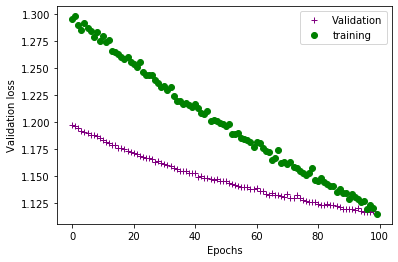

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

epochs_val = range(0, len(train_loss))
epochs = range(0, len(train_loss))

plt.plot(epochs_val, val_loss, 'b+', label='Validation', c = 'purple')
plt.plot(epochs, train_loss, 'bo', label='training', c ='green')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [33]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print('test_acc:', test_acc)
test_loss

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_acc: 0.6146


1.123406558418274

In [15]:
model.save_weights('./cifar10_VGG16.h5', overwrite=True)